# Reference
**Paper** : 
https://liminyang.web.illinois.edu/data/DLS21_BODMAS.pdf

**Website** : 
https://whyisyoung.github.io/BODMAS/

**Drive** : 
https://drive.google.com/drive/folders/1Uf-LebLWyi9eCv97iBal7kL1NgiGEsv_


### Import required Modules

In [1]:
import numpy as np
import pandas as pd

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns


# Preprocessing
from sklearn.preprocessing import LabelEncoder

# Modeling
from sklearn.linear_model import LogisticRegression
# Ensemble Models and CLF-Voting
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import VotingClassifier

import xgboost as xgb
from xgboost import XGBClassifier


# Evaluation
from sklearn.metrics import accuracy_score


%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

# Set seed for reproducibility
seed = 44

C:\ProgramData\Anaconda3\lib\site-packages\xgboost\compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


### Load our Feature-Vectors

In [2]:
bodMas = 'bodmas.npz'
bodMas_df = np.load(bodMas)

bodMas_df

In [3]:
bodMas_df.files

['X', 'y']

In [4]:
# Identify X & y
X = bodMas_df['X']
y = bodMas_df['y']

print(X.shape, y.shape)

(134435, 2381) (134435,)


In [5]:
print(X[10:]) ; print(y[10:])

[[0.12141006 0.00910332 0.00467501 ... 0.         0.         0.        ]
 [0.18317465 0.04973748 0.00886418 ... 0.         0.         0.        ]
 [0.7121212  0.01136364 0.01515152 ... 0.         0.         0.        ]
 ...
 [0.1423067  0.01637877 0.01097404 ... 0.         0.         0.        ]
 [0.14230758 0.01637877 0.01097404 ... 0.         0.         0.        ]
 [0.1423067  0.01637877 0.01097404 ... 0.         0.         0.        ]]
[0 0 0 ... 1 1 1]


In [6]:
np.unique(y)

array([0, 1])

### Prediction here is malicious or benign

#### And based on binary-Y we will build binary-Classifieres first.

### Read Metadata 

In [7]:
bodmas_meta = pd.read_csv('bodmas_metadata.csv', parse_dates= ['timestamp'])

bodmas_meta.head()

,sha,timestamp,family
0,e6d7b4bab32def853ab564410df53fa33172dda1bfd48c...,2007-01-01 08:46:39+00:00,NaN
1,5af37a058a5bcf2284c183ee98d92b7c66d8f5ce623e92...,2007-01-26 17:16:30+00:00,NaN
2,5bfbbea150af5cef2d3a93b80ef7c7faea9f564b56045d...,2007-03-21 02:08:53+00:00,NaN
3,216f592f1e1717d5681b7f5f2b14a28a2f0c603b5b7318...,2007-04-25 12:55:06+00:00,NaN
4,a1ca76813d2e9e7e23b830c87fbe29bcb51fcbe096e445...,2007-11-14 15:03:55+00:00,NaN


In [8]:
# Check unique families and their number
bodmas_meta.family.unique() , bodmas_meta.family.nunique()

(array([nan, 'autoit', 'sakurel', 'gupboot', 'juched', 'hpgandcrab',
        'fuerboos', 'noancooe', 'skeeyah', 'wacatac', 'mira', 'upatre',
        'delfiles', 'ceeinject', 'plugx', 'unruy', 'cambot', 'klez',
        'mocrt', 'nitol', 'vb', 'small', 'simda', 'sillyp2p', 'ditertag',
        'padodor', 'dinwod', 'fakefolder', 'dofoil', 'mydoom', 'urelas',
        'qqpass', 'benjamin', 'gandcrab', 'gepys', 'fearso', 'wanna',
        'dorv', 'qlowzones', 'injector', 'qhosts', 'lolbot', 'wabot',
        'ganelp', 'malex', 'vobfus', 'systex', 'blocker', 'shifu', 'sytro',
        'cuegoe', 'stration', 'occamy', 'trojanx', 'tofsee', 'stormser',
        'ainslot', 'vtflooder', 'sfone', 'picsys', 'koceg', 'duptwux',
        'simbot', 'obfuscator', 'autinject', 'socks', 'pluto',
        'cryptominer', 'plite', 'fuery', 'musecador', 'fareit', 'berbew',
        'drolnux', 'lunam', 'floxif', 'zbot', 'netwire', 'grandcrab',
        'ursnif', 'msposer', 'autorun', 'soltern', 'mofksys', 'carberp',
   

In [9]:
# Check number of samples of most common family 
x = bodmas_meta.family.value_counts().to_frame().head(10)
print(x)

          family
sfone       4729
wacatac     4694
upatre      3901
wabot       3673
small       3339
ganelp      2232
dinwod      2057
mira        1960
berbew      1749
sillyp2p    1616


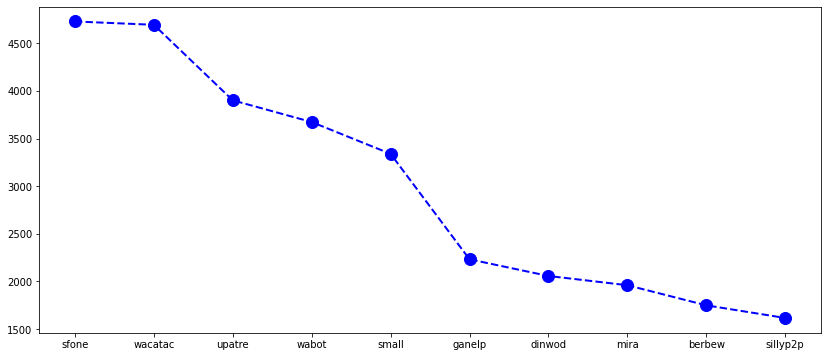

In [10]:
# Visualize most common family (10)
plt.figure(figsize = (14,6))
plt.plot(x, color='blue', marker='o', linestyle='dashed',
     linewidth=2, markersize=12)
plt.show()

In [11]:
# Convert timestamp to date
bodmas_meta['timestamp'] = pd.to_datetime(bodmas_meta['timestamp'], format = '%Y-%m-%d %H:%M:%S', utc=True).astype(np.int64)
bodmas_meta.head()

,sha,timestamp,family
0,e6d7b4bab32def853ab564410df53fa33172dda1bfd48c...,1167641199000000000,NaN
1,5af37a058a5bcf2284c183ee98d92b7c66d8f5ce623e92...,1169831790000000000,NaN
2,5bfbbea150af5cef2d3a93b80ef7c7faea9f564b56045d...,1174442933000000000,NaN
3,216f592f1e1717d5681b7f5f2b14a28a2f0c603b5b7318...,1177505706000000000,NaN
4,a1ca76813d2e9e7e23b830c87fbe29bcb51fcbe096e445...,1195052635000000000,NaN


In [12]:
bodmas_meta.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134435 entries, 0 to 134434
Data columns (total 3 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   sha        134435 non-null  object
 1   timestamp  134435 non-null  int64 
 2   family     57293 non-null   object
dtypes: int64(1), object(2)
memory usage: 3.1+ MB


In [13]:
bodmas_meta.isnull().sum()

sha              0
timestamp        0
family       77142
dtype: int64

In [14]:
# Replace NAN to benign to clarify as benign
bodmas_meta.fillna('benign', inplace= True)
bodmas_meta.head()

,sha,timestamp,family
0,e6d7b4bab32def853ab564410df53fa33172dda1bfd48c...,1167641199000000000,benign
1,5af37a058a5bcf2284c183ee98d92b7c66d8f5ce623e92...,1169831790000000000,benign
2,5bfbbea150af5cef2d3a93b80ef7c7faea9f564b56045d...,1174442933000000000,benign
3,216f592f1e1717d5681b7f5f2b14a28a2f0c603b5b7318...,1177505706000000000,benign
4,a1ca76813d2e9e7e23b830c87fbe29bcb51fcbe096e445...,1195052635000000000,benign


In [15]:
# Check (1) in Y here == malware in metadata
print(bodmas_meta[-61:])
print(y[-61:])

                                                      sha  \
134374  d1225074aeb0fd8e565af4981c8c55784452c5fbcd2cbe...   
134375  db2ac399e68bec4a9cc6cb2b7b4b7cc3217770c25a1109...   
134376  2d2873cf2d4ffa26a784ee0ddb9516f31212f8f0f78495...   
134377  ed433bc20720ad788f4f253f9071eaaae3199c0136788c...   
134378  3ce93329dd561ddcd122bcfc4369c19ffbd1433ce4927e...   
...                                                   ...   
134430  1515deebbf3c55e46c1a4168db8cc0c149810e855a5497...   
134431  502e1af8f263d74b568f6e08dfb4eb2d4228cdef22109a...   
134432  6265ccd5222ed1159000ddcd2b70376a2ed5e3e56795dd...   
134433  2d4d2b77020d17418b6de26e5d728ad3a3cc6a6a44ccab...   
134434  8ad8b39bcb7fb6b1edb6734c90173dff70850046bae5d3...   

                  timestamp     family  
134374  1601424000000000000     benign  
134375  1601433977000000000    wacatac  
134376  1601433980000000000    wacatac  
134377  1601433995000000000    wacatac  
134378  1601434012000000000  elenoocka  
...                  

#### Okay matched

In [16]:
# Drop family -- for now.
# bodmas_meta.drop('family',axis= 1, inplace= True)

In [17]:
# bodmas_meta.head()

### Merge tiemstamp with appropriate category by sha column.

In [18]:
### Take just non-null samples for now..
#### From Category

In [19]:
# Read category data
# bodmas_cate = pd.read_csv('bodmas_malware_category.csv')

In [20]:
# bodmas_cate.head()

In [21]:
# bodmas_cate.info()

#### We can see we have only 57293 samples knows family/category..!

In [22]:
# # rename sha256 to sha to match with metadata
# bodmas_cate.rename(columns= {'sha256' : 'sha'}, inplace= True)

In [23]:
# bodmas_cate.head()

In [24]:
# bodmas_cate.category.unique()

In [25]:
# Combine timestamp from meta with category from bodmas_cate based on sha column
# date_cate = pd.merge(bodmas_meta, bodmas_cate, on= 'sha')
# date_cate.head()

In [26]:
# date_cate.info()

### Label Encoding

In [27]:
# Transform Family into numeric/labels format
le = LabelEncoder()
bodmas_meta['family'] = le.fit_transform(bodmas_meta['family'])

In [28]:
bodmas_meta.head()

,sha,timestamp,family
0,e6d7b4bab32def853ab564410df53fa33172dda1bfd48c...,1167641199000000000,54
1,5af37a058a5bcf2284c183ee98d92b7c66d8f5ce623e92...,1169831790000000000,54
2,5bfbbea150af5cef2d3a93b80ef7c7faea9f564b56045d...,1174442933000000000,54
3,216f592f1e1717d5681b7f5f2b14a28a2f0c603b5b7318...,1177505706000000000,54
4,a1ca76813d2e9e7e23b830c87fbe29bcb51fcbe096e445...,1195052635000000000,54


In [29]:
# drop sha column
bodmas_meta.drop('sha', axis= 1, inplace= True)

In [30]:
bodmas_meta= pd.DataFrame(bodmas_meta)

In [31]:
# Convert ndarray to dataframe
X = pd.DataFrame(X)
X.head()

,0,1,2,3,4,5,6,7,8,9,...,2371,2372,2373,2374,2375,2376,2377,2378,2379,2380
0,0.056742,0.008017,0.007762,0.005466,0.007762,0.004446,0.005430,0.003061,0.009475,0.006305,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.007062,0.004500,0.004498,0.004318,0.004410,0.004330,0.004265,0.004068,0.004391,0.004306,...,0.0,0.0,0.0,0.0,120.0,16564.0,0.0,0.0,0.0,0.0
2,0.020975,0.004699,0.004002,0.004419,0.004214,0.003865,0.003973,0.004297,0.003921,0.004145,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.006482,0.003821,0.003788,0.003866,0.003734,0.003784,0.003884,0.003937,0.003805,0.003809,...,0.0,0.0,0.0,0.0,140.0,16384.0,0.0,0.0,0.0,0.0
4,0.022135,0.003972,0.003834,0.003869,0.003759,0.003765,0.003777,0.003863,0.003773,0.003798,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Combine timestamp & family with X

In [32]:
# res = [X, timestamp]
new_X = pd.concat([X, bodmas_meta], axis=1, ignore_index=True, sort=False)
# X.tail()


# X = X.append(timestamp)
new_X.tail()

,0,1,2,3,4,5,6,7,8,9,...,2373,2374,2375,2376,2377,2378,2379,2380,2381,2382
134430,0.065420,0.005993,0.005216,0.005492,0.005747,0.004183,0.005373,0.004388,0.005619,0.004121,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1601435122000000000,33
134431,0.065421,0.005993,0.005216,0.005492,0.005747,0.004183,0.005373,0.004388,0.005617,0.004121,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1601435123000000000,33
134432,0.142307,0.016379,0.010974,0.005991,0.009369,0.005670,0.003335,0.003099,0.009761,0.002385,...,0.0,0.0,2180.0,585728.0,0.0,0.0,0.0,0.0,1601435124000000000,33
134433,0.142308,0.016379,0.010974,0.005991,0.009369,0.005670,0.003335,0.003099,0.009761,0.002386,...,0.0,0.0,2180.0,585728.0,0.0,0.0,0.0,0.0,1601435126000000000,33
134434,0.142307,0.016379,0.010974,0.005991,0.009369,0.005670,0.003335,0.003099,0.009761,0.002385,...,0.0,0.0,2180.0,585728.0,0.0,0.0,0.0,0.0,1601435127000000000,33


In [33]:
len(X), len(bodmas_meta), len(new_X)

(134435, 134435, 134435)

In [34]:
# Check Nulls
new_X.isnull().sum()

0       0
1       0
2       0
3       0
4       0
       ..
2378    0
2379    0
2380    0
2381    0
2382    0
Length: 2383, dtype: int64

### Split dataset to : 
X_train, y_train, X_test, y_test

In [35]:
from sklearn.model_selection import train_test_split

# Create the training and test sets with meta and without meta
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, stratify= y, random_state= seed)

X_train_, X_test_, y_train_, y_test_ = train_test_split(new_X, y, test_size= 0.2, stratify= y, random_state= seed)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

print(X_train_.shape, y_train_.shape)
print(X_test_.shape, y_test_.shape)

(107548, 2381) (107548,)
(26887, 2381) (26887,)
(107548, 2383) (107548,)
(26887, 2383) (26887,)


### Train Base-Model

In [36]:
# Set the base model..
logReg = LogisticRegression(random_state = seed)

# Fit the training dataset
logReg.fit(X_train, y_train)

LogisticRegression(random_state=44)

In [37]:
# Set the base model with Meta..
logReg_ = LogisticRegression(random_state = seed)

# Fit the training dataset
logReg_.fit(X_train_, y_train_)

LogisticRegression(random_state=44)

#### Evaluate Logistic Regression Without Metadata

In [38]:
# Mean accuracy in train
print('Mean accuracy in Train dataset :', logReg.score(X_train, y_train))
# Mean accuracy in test
print('Mean accuracy in Test dataset :', logReg.score(X_test, y_test))

Mean accuracy in Train dataset : 0.730092609811433
Mean accuracy in Test dataset : 0.7313199687581359


#### Evaluate Logistic Regression With Metadata

In [40]:
# Mean accuracy in train
print('Mean accuracy in Train dataset :', logReg_.score(X_train_, y_train_))
# Mean accuracy in test
print('Mean accuracy in Test dataset :', logReg_.score(X_test_, y_test_))

Mean accuracy in Train dataset : 0.5738275002789452
Mean accuracy in Test dataset : 0.5738089039312679


That's fair ! 

In [41]:
# Evaluate accuracy_score
def Accuracy(model,X_test, y_test):
    # Compute y_pred
    y_pred = model.predict(X_test)
    predictions = [round(prediction) for prediction in y_pred]
    # Compute mse_dt
    logScore = accuracy_score(y_test, predictions)
    # Print 
    return print("Accuracy score for Model : {:.2f}".format(logScore))

In [42]:
Accuracy(logReg, X_test, y_test)

Accuracy score for Model : 0.73


In [43]:
Accuracy(logReg_, X_test_, y_test_)

Accuracy score for Model : 0.57


##### Finish Base Model..

We can see logistic Regression not benefit from Metadata(timestamp and labels of family)

### Voting Classifiers (Binary) >:

In [44]:
# Instantiate knn
knn = KNeighborsClassifier(n_neighbors=27)

# Instantiate dt
dt = DecisionTreeClassifier(min_samples_leaf=0.13, random_state=seed)

# Define the list classifiers
classifiers = [('Logistic Regression', logReg), ('K Nearest Neighbours', knn), ('Classification Tree', dt)]

In [45]:
# Without Metadata
# Iterate over the pre-defined list of classifiers 
for clf_name, clf in classifiers:    

    # Fit clf to the training set
    clf.fit(X_train, y_train)    

    # Predict y_pred
    y_pred = clf.predict(X_test)

    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred) 

    # Evaluate clf's accuracy on the test set
    print('{:s} : {:.3f}'.format(clf_name, accuracy))

Logistic Regression : 0.731
K Nearest Neighbours : 0.948
Classification Tree : 0.824


In [46]:
# With Meta
# Iterate over the pre-defined list of classifiers
for clf_name, clf in classifiers:    

    # Fit clf to the training set
    clf.fit(X_train_, y_train_)    

    # Predict y_pred
    y_pred = clf.predict(X_test_)

    # Calculate accuracy
    accuracy = accuracy_score(y_test_, y_pred) 

    # Evaluate clf's accuracy on the test set
    print('{:s} : {:.3f}'.format(clf_name, accuracy))

Logistic Regression : 0.574
K Nearest Neighbours : 0.995
Classification Tree : 0.979


#### FANTASTIC !

In [47]:
# Without Metadata
# Instantiate a VotingClassifier vc
vc = VotingClassifier(estimators=classifiers)     

# Fit vc to the training set
vc.fit(X_train, y_train)

# Calculate accuracy score
Accuracy(vc, X_test, y_test)

Accuracy score for Model : 0.90


In [48]:
# With Metadata
# Instantiate a VotingClassifier vc
vc = VotingClassifier(estimators=classifiers)     

# Fit vc to the training set
vc.fit(X_train_, y_train_)

# Calculate accuracy score
Accuracy(vc, X_test_, y_test_)

Accuracy score for Model : 0.98


#### AMAZING ..!

#### We can see most Binary-Models benefit from Metadata like(VotingClassifier, K Nearest Neighbours, Classification Tree)
##### MultiClass Models...